<a href="https://colab.research.google.com/github/ProbablyBenjamin/COMP579A1/blob/main/COMP579A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Statements**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random



**Q1 [5 Marks] Bernoulli Bandit Class**

In [ ]:

class Bandit:
  def __init__(self,k, probArray, initialize='samples'):
    self.k = k;
    self.qTrue = probArray;
    self.qAvgEstimates = np.zeros(k);
    self.qEstimates = np.zeros(k);
    self.numPulls = np.zeros(k);


    assert k == len(probArray);

    #Initialize all estimates by sampling levers once
    for armIndex in range(self.k):
      self.qAvgEstimates[armIndex] = self.sample(armIndex);
      self.qEstimates[armIndex] = self.sample(armIndex);
      if(initialize == 'zeros'): #initializes estimates with zeros
        self.qAvgEstimates[armIndex] = 0;
        self.qEstimates[armIndex] = 0;
        self.numPulls[armIndex] = 0;



  
  def sample(self, index):
    self.numPulls[index] +=1;
    return np.random.binomial(n=1, p=self.qTrue[index]);



  def updateAvg(self, armIndex):
    #stores and returns the latest Q estimate of the arm specified by armIndex using the running average method
    reward = self.sample(armIndex);
    self.qAvgEstimates[armIndex] += float(1/self.numPulls[armIndex]) * float((reward - self.qAvgEstimates[armIndex]));

    return [self.qAvgEstimates[armIndex], reward];

  def update(self, armIndex, alpha):
    #stores and returns the latest Q estimate of the arm specified by armIndex using the recency-weighted average method
    reward = self.sample(armIndex);
    self.qEstimates[armIndex] += float(alpha) * float((reward - self.qEstimates[armIndex]));

    return [self.qEstimates[armIndex], reward];

  def reset(self):
    #resets the bandit so it can be used in a new experiment
   for armIndex in range(self.k):
        self.qAvgEstimates[armIndex] = 0;
        self.qEstimates[armIndex] = 0;
        self.numPulls[armIndex] = 0;




*Running 3 armed-bandit test:*

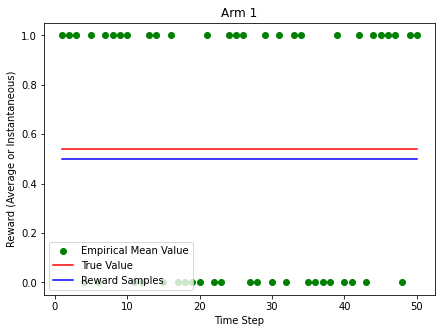

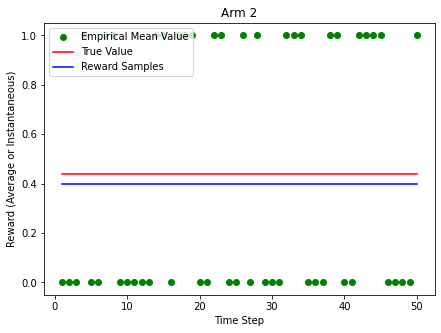

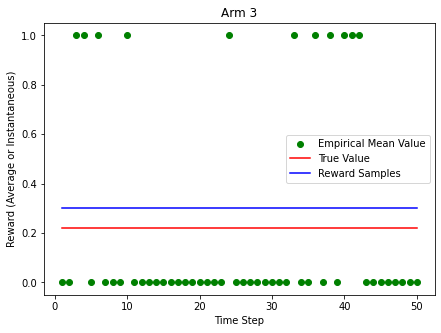

In [ ]:
#experiment variables
delta = 0.1;
num_trials = 50;
bandit1 = Bandit(3, [0.5,0.5-delta,0.5-2*delta]);

#Data collection
data = [];
avgEstimates = [];
estimates1 = [];
estimates2 = [];

for j in range(bandit1.k): #sampling for each arm
  row = [];
  avgRow = [];
  estRow1 = [];
  for i in range(num_trials):
    row.append(bandit1.sample(j));
    avgRow.append(bandit1.updateAvg(j)[0]);
    estRow1.append(bandit1.update(j, 0.1)[0]);


  data.append(row);
  avgEstimates.append(avgRow);
  estimates1.append(estRow1);

#run experiment again with identical bandit and new alpha parameter
bandit1 = Bandit(3, [0.5,0.5-delta,0.5-2*delta]); 

for j in range(bandit1.k):
  estRow2 = [];
  #mean_row = [];
  for i in range(num_trials):
    estRow2.append(bandit1.update(j, 0.01)[0]);

  estimates2.append(estRow2);

#Plotting empirical means
for i in range(bandit1.k):
  plt.figure(i);
  plt.scatter(np.linspace(1, num_trials, num_trials), y=data[i], c='green');
  plt.errorbar(np.linspace(1, num_trials, num_trials), np.mean(data[i]) , c= "red");
  plt.errorbar(np.linspace(1, num_trials, num_trials), bandit1.qTrue[i] , c= "blue");
  plt.legend(['Empirical Mean Value', 'True Value', 'Reward Samples']);
  plt.title('Arm ' + str(i+1));
  plt.ylabel("Reward (Average or Instantaneous)")
  plt.xlabel("Time Step")
  plt.show();



**Q2) Action Value Estimation**

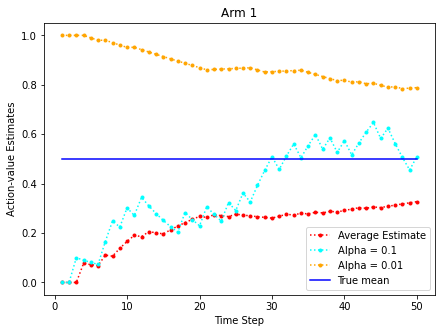

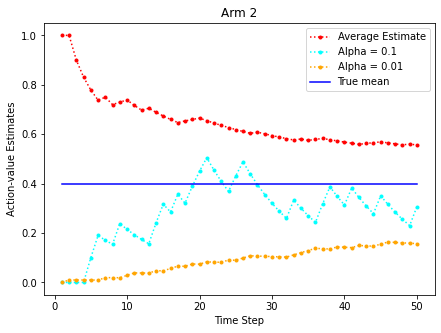

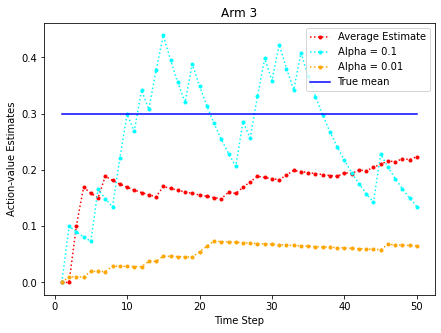

In [ ]:
#Question 2: Plotting different action-value estimations for each arm. 
#Save the data
q2AvgEstimates = avgEstimates;
q2Estimates1 = estimates1;
q2Estimates2 = estimates2;

for i in range(bandit1.k):
  plt.figure(i+bandit1.k);
  plt.plot(np.linspace(1, num_trials, num_trials), q2AvgEstimates[i], c= "red", marker='.', linestyle=':');
  plt.plot(np.linspace(1, num_trials, num_trials), q2Estimates1[i], c= "cyan", marker='.', linestyle=':');
  plt.plot(np.linspace(1, num_trials, num_trials), q2Estimates2[i], c= "orange", marker='.', linestyle=':');
  plt.errorbar(np.linspace(1, num_trials, num_trials), bandit1.qTrue[i], c= "blue");
  plt.legend(['Average Estimate', 'Alpha = 0.1', 'Alpha = 0.01', 'True mean']);
  plt.ylabel("Action-value Estimates");
  plt.xlabel("Time Step")
  plt.title('Arm ' + str(i+1));
  plt.show();
 

**Q3) Repeat Experiments**

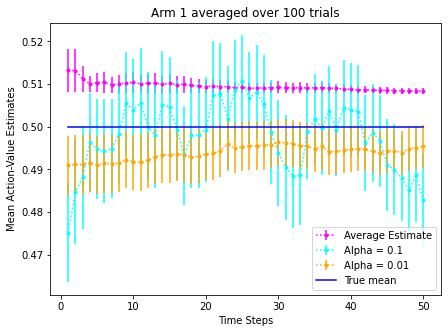

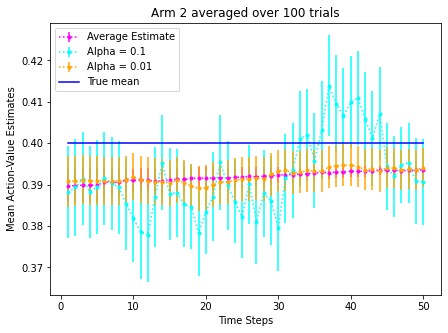

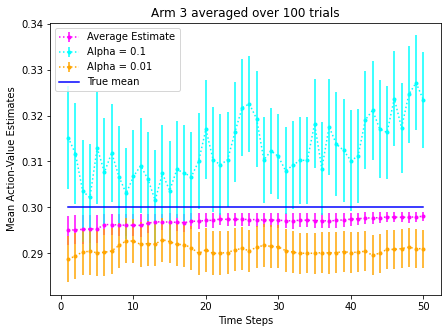

In [ ]:

#Experiment variables
delta = 0.1;
num_experiments = 100; 
num_trials = 50; #number of trials per experiment
bandit2 = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='zeros'); #create new bandit with zeros for initial estimates

#Data collection
avgEstimates = []; #estimates using average method
estimates1 = []; #estimates with alpha = 0.1
estimates2 = []; #estiamtes with alpha = 0.01

for k in range(num_experiments):
  avgExperiment = [];
  estimate1Experiment = [];
  for j in range(bandit2.k):
    avgRow = [];
    est1Row = [];
    for i in range(num_trials):
      avgRow.append(bandit2.updateAvg(j)[0]);
      est1Row.append(bandit2.update(j, 0.1)[0]);

    avgExperiment.append(avgRow);
    estimate1Experiment.append(est1Row);

  avgEstimates.append(avgExperiment); #Each element in the list represents one trial. 
  estimates1.append(estimate1Experiment);


#Run experiment again with second alpha parameter with new identical bandit
bandit2 = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='zeros');

for k in range(num_experiments):
  estimate2Experiment = [];
  for j in range(bandit2.k):
    est2Row = [];
    for i in range(num_trials):
      est2Row.append(bandit2.update(j, 0.01)[0]);
    estimate2Experiment.append(est2Row);

  estimates2.append(estimate2Experiment);



#Compute Average and Standard Error for these 100 runs for each arm
meanAvgEst = [[0]*num_trials for i in range(bandit2.k)];
stdAvgEst = [[0]*num_trials for i in range(bandit2.k)];
meanEst1 = [[0]*num_trials for i in range(bandit2.k)];
stdEst1 = [[0]*num_trials for i in range(bandit2.k)];
meanEst2 = [[0]*num_trials for i in range(bandit2.k)];
stdEst2 = [[0]*num_trials for i in range(bandit2.k)];
#arrays are of size num_trials * bandit_arms

for armIndex in range(bandit2.k):
  for timestepIndex in range(num_trials):
    avgEstimatePerTimestepPerArm = []; #array containing the action-value estimates using the veraging estimate method for each experiment at timestep i, for all arms. 
    est1PerTimestepPerArm = [];
    est2PerTimestepPerArm = [];

    for experimentIndex in range(num_experiments):
      avgEstimatePerTimestepPerArm.append(avgEstimates[experimentIndex][armIndex][timestepIndex]);
      est1PerTimestepPerArm.append(estimates1[experimentIndex][armIndex][timestepIndex]);
      est2PerTimestepPerArm.append(estimates2[experimentIndex][armIndex][timestepIndex]);


    meanAvgEst[armIndex][timestepIndex] = np.mean(avgEstimatePerTimestepPerArm);
    stdAvgEst[armIndex][timestepIndex] = np.std(avgEstimatePerTimestepPerArm, ddof=1) / np.sqrt(np.size(avgEstimatePerTimestepPerArm)); #compute std err
    meanEst1[armIndex][timestepIndex] = np.mean(est1PerTimestepPerArm);
    stdEst1[armIndex][timestepIndex] = np.std(est1PerTimestepPerArm, ddof=1) / np.sqrt(np.size(est1PerTimestepPerArm)); #compute std err
    meanEst2[armIndex][timestepIndex] = np.mean(est2PerTimestepPerArm);
    stdEst2[armIndex][timestepIndex] = np.std(est2PerTimestepPerArm, ddof=1) / np.sqrt(np.size(est2PerTimestepPerArm)); #compute std err

#plot mean values and their error bars for 100 trials
for i in range(bandit1.k):
  plt.figure(i+2*bandit1.k);
  plt.errorbar(np.linspace(1, num_trials, num_trials), meanAvgEst[i], yerr=stdAvgEst[i], c= "magenta", marker='.', linestyle=':');
  plt.errorbar(np.linspace(1, num_trials, num_trials), meanEst1[i], yerr=stdEst1[i], c= "cyan", marker='.', linestyle=':');
  plt.errorbar(np.linspace(1, num_trials, num_trials), meanEst2[i], yerr=stdEst2[i], c= "orange", marker='.', linestyle=':');
  plt.errorbar(np.linspace(1, num_trials, num_trials), bandit1.qTrue[i], c= "blue");
  plt.legend(['Average Estimate', 'Alpha = 0.1', 'Alpha = 0.01', "True mean"]);
  plt.title('Arm ' + str(i+1) + " averaged over 100 trials");
  plt.ylabel("Mean Action-Value Estimates")
  plt.xlabel("Time Steps")
  plt.show();


# Analysis 

---

From these results, we observe that all three methods estimate the mean with a high degree of accuracy (to the nearest few hundredths). Action-value estimation using the incremental mean computation method yielded the smallest deviation, but depended heavily on initial samples, becoming inaccurate if initial samples contained outliers. Both fixed learning-rate methods performed well, however α = 0.1 had higher standard deviation and fluctuation. α = 0.01 seemed to behave more smoothly, and sometimes had trouble converging towards the true mean. 

α = 0.01 seems to be undoubtedly better, since we seem to strike a balance between weighting recent samples more heavily, while also keeping older samples into account. This is seen by the lower standard deviation, as well as the ability to converge to the true mean despite initial samples deviating from it. Nevertheless, both are able to converge to the true mean more than the averaging method. To optimize further, I would perform a gridsearch with values of α in the neighborhood of 0.05, since we see relatively low standard error with the ability to somewhat converge to the true mean. 







**Q4) ϵ-Greedy Algorithm**

In [ ]:
#Runs the e-greedy bandit algorithm for a set amount of iterations. Default uses averaging method.
def epsilonGreedy(bandit, iterations, epsilon, alpha=0):
  rewards = [];
  endChoices = [];
  if(alpha != 0):
    for iteration in range(iterations):
    #choose between optimal reward and random arm, with random tiebreaks between equal max estimates
      greedyArm = np.random.choice(np.flatnonzero(bandit.qEstimates == bandit.qEstimates.max()))
      
      randomAction = np.random.randint(0,bandit.k); 
      twoChoices = [greedyArm, randomAction];
      #pull resulting arm, (either max arm or random arm) and store its reward.
      chosen = random.choices(twoChoices, weights=(1-epsilon,epsilon), k=1)[0];
      reward = bandit.update(chosen, alpha)[1];
      rewards.append(reward);
      endChoices.append(chosen);

    #reset bandit once done
    bandit.reset();
    return [rewards, endChoices];
  else:
    for iteration in range(iterations):
      #choose between optimal reward and random arm, with random tiebreaks between equal max estimates
      greedyArm = np.random.choice(np.flatnonzero(bandit.qAvgEstimates == bandit.qAvgEstimates.max()))
      
      randomAction = np.random.randint(0,bandit.k); 
      twoChoices = [greedyArm, randomAction];
      #pull resulting arm, (either max arm or random arm) and store its reward.
      chosen = random.choices(twoChoices, weights=(1-epsilon,epsilon), k=1)[0];
      reward = bandit.updateAvg(chosen)[1];
      rewards.append(reward);
      endChoices.append(chosen);

    #reset bandit once done
    bandit.reset();
    return [rewards, endChoices];


  



*Part a)*

In [ ]:
def plotRewardOverTime(bandit, num_experiments, num_trials, epsilon, figure_num, colour, ecolour, alpha=0):

  results = [];
  for experimentIndex in range(num_experiments):
    results.append(epsilonGreedy(bandit, num_trials, epsilon, alpha)[0]);

  meanResults = [];
  stdErr = [];
  for timestepIndex in range(num_trials):
    resultPerTimeStep = [];
    for experimentIndex in range(num_experiments):
      resultPerTimeStep.append(results[experimentIndex][timestepIndex]);

    meanResults.append(np.mean(resultPerTimeStep));
    stdErr.append(np.std(resultPerTimeStep, ddof=1) / np.sqrt(np.size(resultPerTimeStep))); #compute std err
      
  
  totalReward = [];
  totalError = [];
  for timestep in range(num_trials):
    totalReward.append(np.sum(meanResults[0:timestep]));
    totalError.append(np.sum(stdErr[0:timestep]));

  plt.figure(figure_num);
  plt.errorbar(np.linspace(1, 1000, 1000), totalReward, yerr=totalError, errorevery=100+np.random.randint(-25,25), ecolor=ecolour, c=colour, ms=1); #error bars randomized for easier viewing
  plt.title('Average Reward Over Time');
  plt.ylabel('Average Reward');
  plt.xlabel('Time Steps');



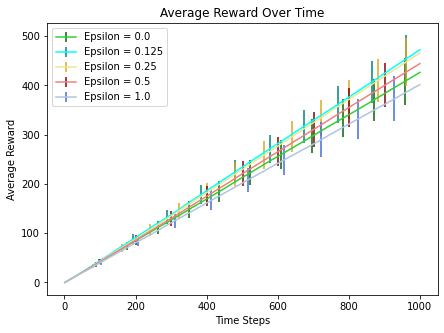

In [ ]:
epsilon_values = [0.0, 0.125, 0.25, 0.5, 1.0]  #change values to see comparisons
colours = ["limegreen", "darkgreen", "cyan", "teal", "khaki", "goldenrod", "lightcoral", "maroon", "lightsteelblue", "royalblue"];

for index in range(len(epsilon_values)): 
  greedyBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='zeros');
  num_experiments = 100; 
  num_trials = 1000;
  plotRewardOverTime(greedyBandit, num_experiments, num_trials, epsilon_values[index], 10, colours[2*index], colours[2*index+1]);
plt.figure(10)
plt.legend(['Epsilon = 0.0', 'Epsilon = 0.125', 'Epsilon = 0.25', 'Epsilon = 0.5', 'Epsilon = 1.0']);

#NOTE: Error bars are plotted semi-randomly and at intervals to avoid cluttering and overlapping. 


*Part b)*

In [ ]:
def plotFractionOfRuns(bandit, num_experiments, num_trials, epsilon, figure_num, colour, alpha=0):
  results = [];

  for experimentIndex in range(num_experiments):
    results.append(epsilonGreedy(bandit, num_trials, epsilon, alpha)[1]);

  percentageResults = [];

  for timestepIndex in range(num_trials):
    resultsPerTimestep = [];
    for experimentIndex in range(num_experiments):
      resultsPerTimestep.append(results[experimentIndex][timestepIndex]);


    percentageResults.append(resultsPerTimestep.count(0));

  plt.figure(figure_num);
  plt.errorbar(np.linspace(1, 1000, 1000), percentageResults, c=colour, ms=2);
  plt.title('Percentage Optimal Choices Over Time')
  plt.ylabel('Percentage of Optimal Choice Made');
  plt.xlabel('Time Steps');


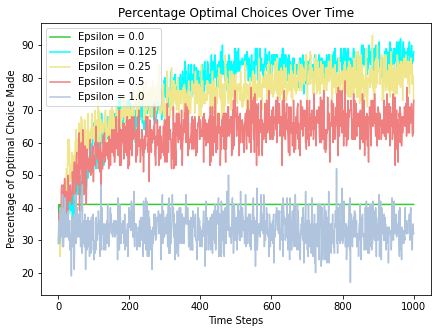

In [ ]:
epsilon_values = [0.0, 0.125, 0.25, 0.5, 1.0]  #change values to see comparisons
colours = ["limegreen", "cyan", "khaki", "lightcoral", "lightsteelblue"];

for index in range(len(epsilon_values)):   
  greedyBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='zeros');
  num_experiments = 100;
  num_trials = 1000;

  plotFractionOfRuns(greedyBandit, num_experiments, num_trials, epsilon_values[index], 11, colours[index]);
plt.figure(11);
plt.legend(['Epsilon = 0.0', 'Epsilon = 0.125', 'Epsilon = 0.25', 'Epsilon = 0.5', 'Epsilon = 1.0']);

*Part c) and Part d)*


In [ ]:
def plotRegrets(bandit, num_experiments, num_trials, epsilon, figure_num, colour, alpha=0): #plots both cumulative and instantaneous regret
  results = [];

  for experimentIndex in range(num_experiments):
     results.append(epsilonGreedy(bandit, num_trials, epsilon, alpha)[1]); 

  instantRegret = [];

  for timestepIndex in range(num_trials):
    resultsPerTimestep = [];
    for experimentIndex in range(num_experiments):
      #from the choices, compute instantenous regret from true expected action-values
      regret = (bandit.qTrue[0] - bandit.qTrue[results[experimentIndex][timestepIndex]])

      resultsPerTimestep.append(regret);


    instantRegret.append(np.mean(resultsPerTimestep));

  plt.figure(figure_num);
  plt.errorbar(np.linspace(1, 1000, 1000), instantRegret, c=colour, ms=2);
  plt.title('Instantanoeus Loss over Time')
  plt.ylabel('Instantaneous Loss');
  plt.xlabel('Time Steps');

  totalRegret = [];
  for timestep in range(num_trials):
    totalRegret.append(np.sum(instantRegret[0:timestep]));

  plt.figure(figure_num+1);
  plt.errorbar(np.linspace(1, 1000, 1000), totalRegret, c=colour, ms=2);
  plt.title('Total Loss Over Time');
  plt.ylabel('Total Loss');
  plt.xlabel('Time Steps');

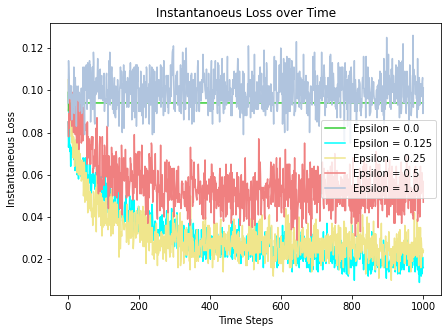

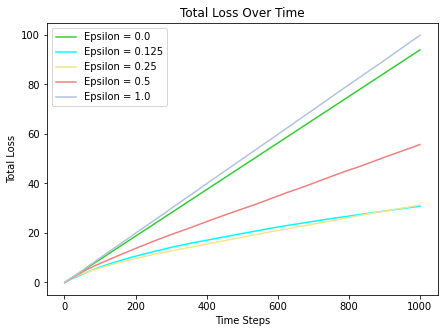

In [ ]:
epsilon_values = [0.0, 0.125, 0.25, 0.5, 1.0]  #change values to see comparisons
colours = ["limegreen", "cyan", "khaki", "lightcoral", "lightsteelblue"];

for index in range(len(epsilon_values)):   
  greedyBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='zeros');
  num_experiments = 100;
  num_trials = 1000

  plotRegrets(greedyBandit, num_experiments, num_trials, epsilon_values[index], 12, colours[index]);
plt.figure(12);
plt.legend(['Epsilon = 0.0', 'Epsilon = 0.125', 'Epsilon = 0.25', 'Epsilon = 0.5', 'Epsilon = 1.0']);
plt.figure(13);
plt.legend(['Epsilon = 0.0', 'Epsilon = 0.125', 'Epsilon = 0.25', 'Epsilon = 0.5', 'Epsilon = 1.0']);

# Analysis


---

From these graphs we observe the effect ϵ has on the total reward and regret. We see the trade-off between exploration and exploitation in effect. The lowest and highest value of ϵ (ϵ=0) perform the worst, with linear total loss and lower overall rewards due to either a lack of exploration or over-exploration. Meanwhile, intermediate values of of ϵ (0.125, 0.25, 0.5) strike a balance between exploration and exploitation, and seem to perform better- achieving lower and possibly even sub-linear regret. We observe that lower values of ϵ seem to perform the best (ϵ=0.125), guaranteeing a small amount of exploration but still mostly exploiting the optimal estimated action value. Thus a low but non-zero value of ϵ allows us to still exploit optimal action-values while guarding against cases of unlucky initial actions. 

**Question 5: ϵ and α experiments for ϵ-Greedy**

*Range of α-values for ϵ=0.125*

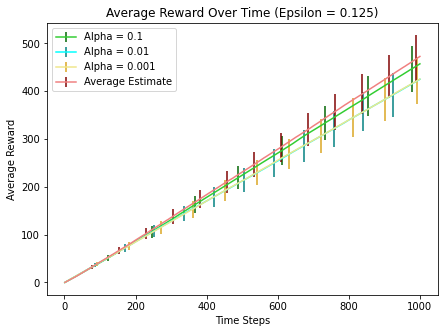

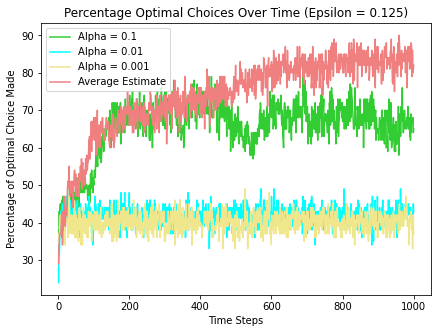

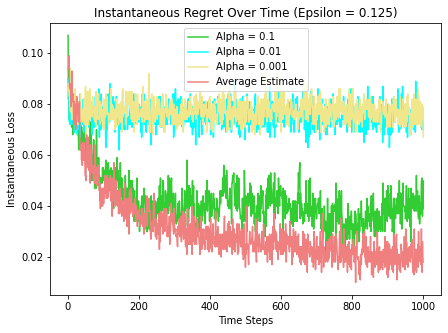

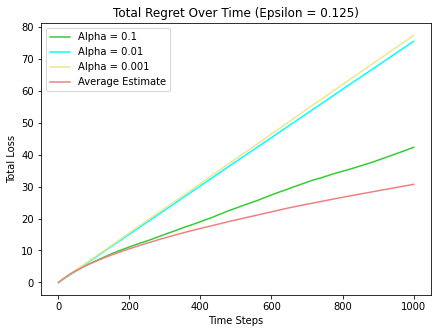

In [ ]:
epsilon_values = [0.125, 0.25]  #change values to see comparisons
colours = ["limegreen", "darkgreen", "cyan", "teal", "khaki", "goldenrod", "lightcoral", "maroon", "lightsteelblue", "royalblue"];
num_experiments = 100;
num_trials = 1000
alpha_values = [0.1, 0.01, 0.001, 0];

for index in range(len(alpha_values)):   
  greedyBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='zeros');
  plotRewardOverTime(greedyBandit, num_experiments, num_trials, epsilon_values[0], 14, colours[2*index], colours[2*index+1], alpha=alpha_values[index]);
  
  greedyBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='zeros');
  plotFractionOfRuns(greedyBandit, num_experiments, num_trials, epsilon_values[0], 15, colours[2*index], alpha=alpha_values[index]);

 
  greedyBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='zeros');
  plotRegrets(greedyBandit, num_experiments, num_trials, epsilon_values[0], 16, colours[2*index], alpha=alpha_values[index]);

plt.figure(14)
plt.title('Average Reward Over Time (Epsilon = 0.125)');
plt.legend(['Alpha = 0.1', 'Alpha = 0.01', 'Alpha = 0.001', 'Average Estimate']);

plt.figure(15)
plt.title('Percentage Optimal Choices Over Time (Epsilon = 0.125)');
plt.legend(['Alpha = 0.1', 'Alpha = 0.01', 'Alpha = 0.001', 'Average Estimate']);

plt.figure(16)
plt.title('Instantaneous Regret Over Time (Epsilon = 0.125)');
plt.legend(['Alpha = 0.1', 'Alpha = 0.01', 'Alpha = 0.001', 'Average Estimate']);

plt.figure(17)
plt.title('Total Regret Over Time (Epsilon = 0.125)');
plt.legend(['Alpha = 0.1', 'Alpha = 0.01', 'Alpha = 0.001', 'Average Estimate']);

*Range of α-values for ϵ=0.25*

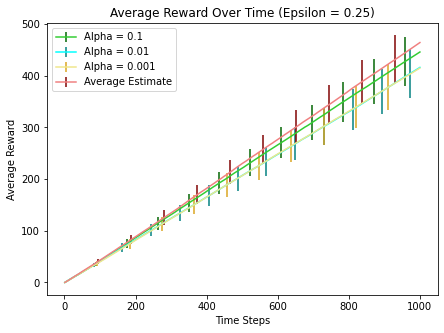

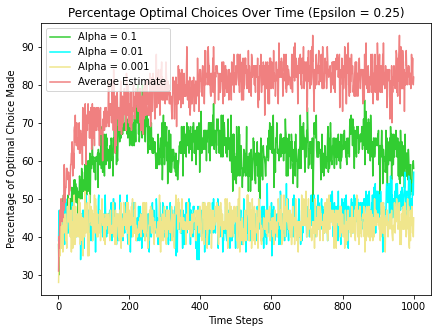

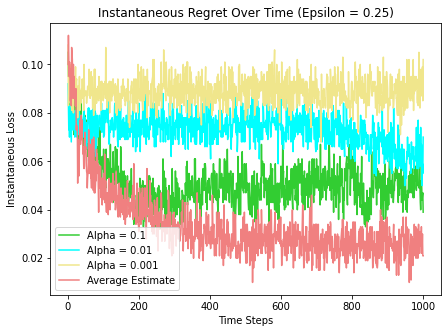

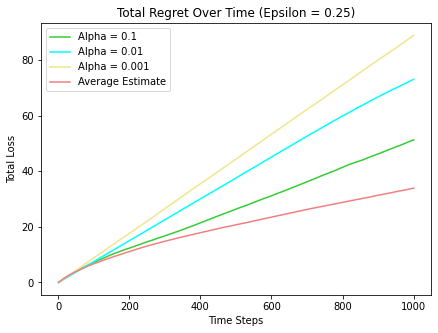

In [ ]:
for index in range(len(alpha_values)):   
  greedyBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='zeros');
  plotRewardOverTime(greedyBandit, num_experiments, num_trials, epsilon_values[1], 14, colours[2*index], colours[2*index+1], alpha=alpha_values[index]);
  
  greedyBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='zeros');
  plotFractionOfRuns(greedyBandit, num_experiments, num_trials, epsilon_values[1], 15, colours[2*index], alpha=alpha_values[index]);

 
  greedyBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='zeros');
  plotRegrets(greedyBandit, num_experiments, num_trials, epsilon_values[1], 16, colours[2*index], alpha=alpha_values[index]);

plt.figure(14)
plt.title('Average Reward Over Time (Epsilon = 0.25)');
plt.legend(['Alpha = 0.1', 'Alpha = 0.01', 'Alpha = 0.001', 'Average Estimate']);

plt.figure(15)
plt.title('Percentage Optimal Choices Over Time (Epsilon = 0.25)');
plt.legend(['Alpha = 0.1', 'Alpha = 0.01', 'Alpha = 0.001', 'Average Estimate']);

plt.figure(16)
plt.title('Instantaneous Regret Over Time (Epsilon = 0.25)');
plt.legend(['Alpha = 0.1', 'Alpha = 0.01', 'Alpha = 0.001', 'Average Estimate']);

plt.figure(17)
plt.title('Total Regret Over Time (Epsilon = 0.25)');
plt.legend(['Alpha = 0.1', 'Alpha = 0.01', 'Alpha = 0.001', 'Average Estimate']);

**Analysis**


---


As can be seen, it seems that using the recency-weighted method with our chosen ϵ values leads to less learning and higher total regret. Larger values of α (α=0.1) seem to perform better than lower values of α. In both cases, the best performing model is still the one using the averaging method. The overall best method is ϵ=0.125 using the averaging method.

[Note: Graphs were drawn separately for different values of alpha in order to avoid overly-cluttered graphs]

**Question 6: UCB**

In [ ]:
#runs the UCB algorithm for a fixed number of iterations
def UCB(bandit, iterations, c, alpha=0):
  rewards = [];
  endChoices = [];
  if(alpha != 0): #use non-averaging updates
    for iteration in range(iterations):
    #choose between optimal reward and random arm, with random tiebreaks between equal max estimates
      ucbArray = [];
      for estimate in range(len(bandit.qEstimates)):
        if(iteration == 0):
          ucb = bandit.qEstimates[estimate];
          ucbArray.append(ucb);
          continue;        

        ucb = bandit.qEstimates[estimate] + c*np.sqrt(np.log(iteration)/bandit.numPulls[estimate]);
        ucbArray.append(ucb);

      #convert to np array
      ucbArray = np.array(ucbArray);
      greedyArm = np.random.choice(np.flatnonzero(ucbArray == ucbArray.max()));
      reward = bandit.update(greedyArm, alpha)[1];
      rewards.append(reward);
      endChoices.append(greedyArm);

    #reset bandit once done
    bandit.reset();
    #do one pull for each 
    for armIndex in range(bandit.k):
      bandit.qEstimates[armIndex] = bandit.sample(armIndex);

    return [rewards, endChoices];
  else:
    for iteration in range(iterations):
    #choose between optimal reward and random arm, with random tiebreaks between equal max estimates
      ucbArray = [];
      for estimate in range(len(bandit.qAvgEstimates)):
        if(iteration == 0):
          ucb = bandit.qAvgEstimates[estimate];
          ucbArray.append(ucb);
          continue;

        ucb = bandit.qAvgEstimates[estimate] + c*np.sqrt(np.log(iteration)/bandit.numPulls[estimate]);
        ucbArray.append(ucb);

      ucbArray = np.array(ucbArray);
      greedyArm = np.random.choice(np.flatnonzero(ucbArray == ucbArray.max()));
      reward = bandit.updateAvg(greedyArm)[1];
      rewards.append(reward);
      endChoices.append(greedyArm);

    #reset bandit once done
    bandit.reset();
    #do one pull for each 
    for armIndex in range(bandit.k):
      bandit.qAvgEstimates[armIndex] = bandit.sample(armIndex);
      
    return [rewards, endChoices];

In [ ]:
def plotRewardOverTimeUCB(bandit, num_experiments, num_trials, c, figure_num, colour, ecolour, alpha=0):

  results = [];
  for experimentIndex in range(num_experiments):
    results.append(UCB(bandit, num_trials, c, alpha)[0]);

  meanResults = [];
  stdErr = [];
  for timestepIndex in range(num_trials):
    resultPerTimeStep = [];
    for experimentIndex in range(num_experiments):
      resultPerTimeStep.append(results[experimentIndex][timestepIndex]);

    meanResults.append(np.mean(resultPerTimeStep));
    stdErr.append(np.std(resultPerTimeStep, ddof=1) / np.sqrt(np.size(resultPerTimeStep))); #compute std err
      
  
  totalReward = [];
  totalError = [];
  for timestep in range(num_trials):
    totalReward.append(np.sum(meanResults[0:timestep]));
    totalError.append(np.sum(stdErr[0:timestep]));

  plt.figure(figure_num);
  plt.errorbar(np.linspace(1, num_trials, num_trials), totalReward, yerr=totalError, errorevery=100+np.random.randint(-25,25), ecolor=ecolour, c=colour, ms=1); #error bars randomized for easier viewing
  plt.title('Average Reward Over Time');
  plt.ylabel('Average Reward');
  plt.xlabel('Time Steps');
  

In [ ]:
def plotFractionOfRunsUCB(bandit, num_experiments, num_trials, c, figure_num, colour, alpha=0):
  results = [];

  for experimentIndex in range(num_experiments):
    results.append(UCB(bandit, num_trials, c, alpha)[1]);

  percentageResults = [];

  for timestepIndex in range(num_trials):
    resultsPerTimestep = [];
    for experimentIndex in range(num_experiments):
      resultsPerTimestep.append(results[experimentIndex][timestepIndex]);


    percentageResults.append(resultsPerTimestep.count(0));

  plt.figure(figure_num);
  plt.errorbar(np.linspace(1, num_trials, num_trials), percentageResults, c=colour, ms=2);
  plt.title('Percentage Optimal Choice Over Time (UCB)');
  plt.ylabel('Percentage of Optional Choice Made');
  plt.xlabel('Time Step');

In [ ]:
def plotRegretsUCB(bandit, num_experiments, num_trials, c, figure_num, colour, alpha=0): #plots both cumulative and instantaneous regret
  results = [];

  for experimentIndex in range(num_experiments):
     results.append(UCB(bandit, num_trials, c, alpha)[1]); 

  instantRegret = [];

  for timestepIndex in range(num_trials):
    resultsPerTimestep = [];
    for experimentIndex in range(num_experiments):
      #from the choices, compute instantenous regret from true expected action-values
      regret = (bandit.qTrue[0] - bandit.qTrue[results[experimentIndex][timestepIndex]])

      resultsPerTimestep.append(regret);


    instantRegret.append(np.mean(resultsPerTimestep));

  plt.figure(figure_num);
  plt.errorbar(np.linspace(1, num_trials, num_trials), instantRegret, c=colour, ms=2);
  plt.title('Instantaneous Regret Over Time (UCB)');
  plt.ylabel('Instantaneous Regret');
  plt.xlabel('Time Step');

  totalRegret = [];
  for timestep in range(num_trials):
    totalRegret.append(np.sum(instantRegret[0:timestep]));

  plt.figure(figure_num+1);
  plt.errorbar(np.linspace(1, num_trials, num_trials), totalRegret, c=colour, ms=2);
  plt.title('Total Regret Over Time (UCB)');
  plt.ylabel('Total Regret');
  plt.xlabel('Time Step');

*UCB with different α-values*

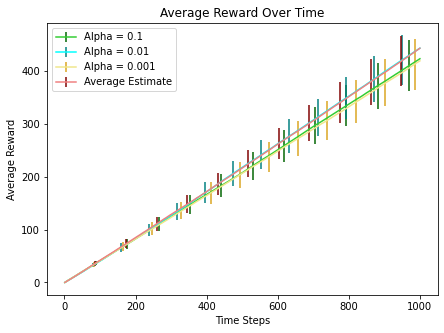

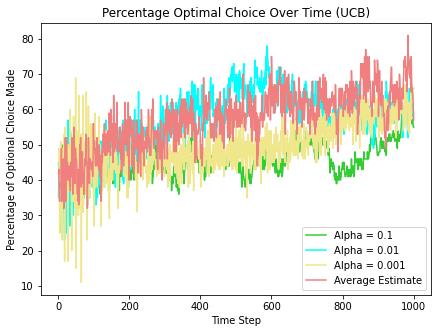

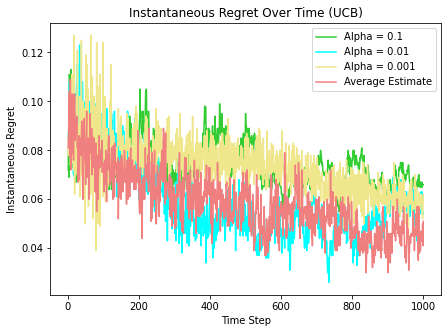

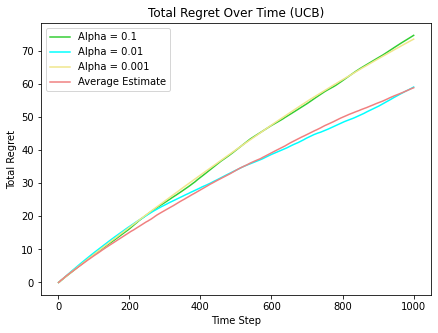

In [ ]:

colours = ["limegreen", "darkgreen", "cyan", "teal", "khaki", "goldenrod", "lightcoral", "maroon", "lightsteelblue", "royalblue"];
alpha_values=[0.1, 0.01, 0.001, 0]

for index in range(len(alpha_values)):
  ucbBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='samples');
  num_experiments = 100; 
  num_trials = 1000;
  plotRewardOverTimeUCB(ucbBandit, num_experiments, num_trials, 2, 18, colours[2*index], colours[2*index+1], alpha=alpha_values[index]);
  ucbBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='samples');
  plotFractionOfRunsUCB(ucbBandit, num_experiments, num_trials, 2, 19, colours[2*index], alpha=alpha_values[index]);
  ucbBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='samples');
  plotRegretsUCB(ucbBandit, num_experiments, num_trials, 2, 20, colours[2*index], alpha=alpha_values[index]);

plt.figure(18)
plt.title
plt.legend(['Alpha = 0.1', 'Alpha = 0.01', 'Alpha = 0.001', 'Average Estimate']);
plt.figure(19)
plt.legend(['Alpha = 0.1', 'Alpha = 0.01', 'Alpha = 0.001', 'Average Estimate']);
plt.figure(20)
plt.legend(['Alpha = 0.1', 'Alpha = 0.01', 'Alpha = 0.001', 'Average Estimate']);
plt.figure(21)
plt.legend(['Alpha = 0.1', 'Alpha = 0.01', 'Alpha = 0.001', 'Average Estimate']);



# Analysis


---

We observe that all UCB algorithms perform similarly, with a cumulative reward of roughly 500, and percentage optimal choice averaging aroiund 60%. However, the best hyperparameter combination most of the time seems to be either α = 0.01 and c=2, (or c=2 with the averaging method on occasion) which has the lowest total regret over time. In general, UCB seems to take much longer to converge to the optimal acton-value (if it converges at all), and all models expressing similar levels of instantaneous and total regret.

**Question 7: Thompson Sampling**

In [ ]:

def BernoulliThompsonSampling(bandit, iterations):
  successAndFailures = np.zeros((bandit.k,2)); #(i,j) corresponds to arm i and number of successes (index 0) or failures (index 1)
  rewards = [];
  endChoices = [];

  #initialize each arm
  for timestepIndex in range(num_trials):
    betaSample = [];
    for arm in range(bandit.k):
      betaSample.append(np.random.beta(successAndFailures[arm][0]+1,successAndFailures[arm][1]+1)) #sample from beta(successes+1, failures+1) and store 

    bestArm = np.argmax(betaSample);
    reward = bandit.sample(bestArm); #pull arm which has the highest probability 

    rewards.append(reward);
    endChoices.append(bestArm);

    if(reward):
      successAndFailures[bestArm][0] += 1;
    else:
      successAndFailures[bestArm][1] += 1; #update successes and failures depending

  bandit.reset();

  return [rewards, endChoices];

    

  

In [ ]:
def plotRewardOverTimeTS(bandit, num_experiments, num_trials, figure_num, colour, ecolour):

  results = [];
  for experimentIndex in range(num_experiments):
    results.append(BernoulliThompsonSampling(bandit, num_trials)[0]);

  meanResults = [];
  stdErr = [];
  for timestepIndex in range(num_trials):
    resultPerTimeStep = [];
    for experimentIndex in range(num_experiments):
      resultPerTimeStep.append(results[experimentIndex][timestepIndex]);

    meanResults.append(np.mean(resultPerTimeStep));
    stdErr.append(np.std(resultPerTimeStep, ddof=1) / np.sqrt(np.size(resultPerTimeStep))); #compute std err
      
  
  totalReward = [];
  totalError = [];
  for timestep in range(num_trials):
    totalReward.append(np.sum(meanResults[0:timestep]));
    totalError.append(np.sum(stdErr[0:timestep]));

  plt.figure(figure_num);
  plt.errorbar(np.linspace(1, 1000, 1000), totalReward, yerr=totalError, errorevery=100+np.random.randint(-25,25), ecolor=ecolour, c=colour, ms=2); #error bars randomized for easier viewing
  plt.title('Average Reward Over Time');
  plt.ylabel('Average Reward');
  plt.xlabel('Time Steps');

In [ ]:
def plotFractionOfRunsTS(bandit, num_experiments, num_trials, figure_num, colour):
  results = [];

  for experimentIndex in range(num_experiments):
    results.append(BernoulliThompsonSampling(bandit, num_trials)[1]);

  percentageResults = [];

  for timestepIndex in range(num_trials):
    resultsPerTimestep = [];
    for experimentIndex in range(num_experiments):
      resultsPerTimestep.append(results[experimentIndex][timestepIndex]);


    percentageResults.append(resultsPerTimestep.count(0));

  plt.figure(figure_num);
  plt.errorbar(np.linspace(1, 1000, 1000), percentageResults, c=colour, ms=2);
  
  plt.title('Percentage Optimal Choice Over Time (Thompson Sampling)');
  plt.ylabel('Percentage of Optional Choice Made');
  plt.xlabel('Time Step');

In [ ]:
def plotRegretsTS(bandit, num_experiments, num_trials, figure_num, colour): #plots both cumulative and instantaneous regret
  results = [];

  for experimentIndex in range(num_experiments):
     results.append(BernoulliThompsonSampling(bandit, num_trials)[1]); 

  instantRegret = [];

  for timestepIndex in range(num_trials):
    resultsPerTimestep = [];
    for experimentIndex in range(num_experiments):
      #from the choices, compute instantenous regret from true expected action-values
      regret = (bandit.qTrue[0] - bandit.qTrue[results[experimentIndex][timestepIndex]])

      resultsPerTimestep.append(regret);


    instantRegret.append(np.mean(resultsPerTimestep));

  plt.figure(figure_num);
  plt.errorbar(np.linspace(1, 1000, 1000), instantRegret, c=colour, ms=2);
  plt.title('Instantaneous Regret Over Time (Thompson Sampling)');
  plt.ylabel('Instantaneous Regret');
  plt.xlabel('Time Step');

  totalRegret = [];
  for timestep in range(num_trials):
    totalRegret.append(np.sum(instantRegret[0:timestep]));

  plt.figure(figure_num+1);
  plt.errorbar(np.linspace(1, 1000, 1000), totalRegret, c=colour, ms=2);
  plt.title('Total Regret Over Time (Thompson Sampling)');
  plt.ylabel('Total Regret');
  plt.xlabel('Time Step');


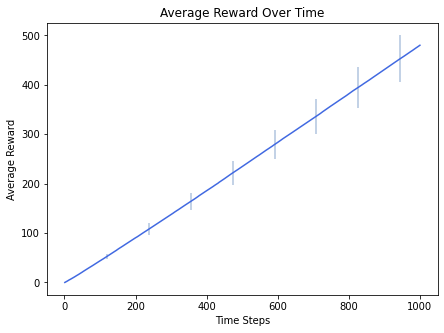

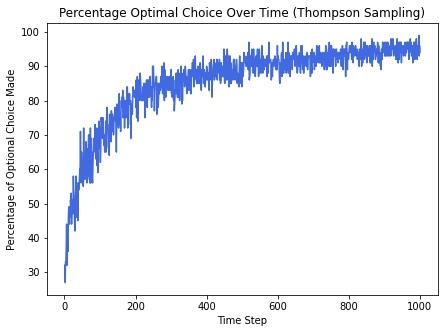

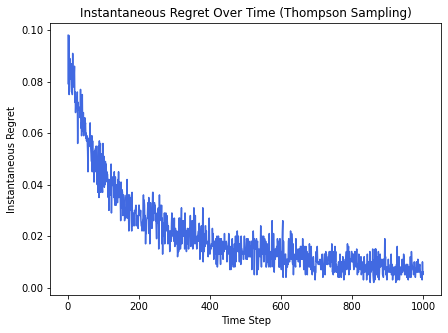

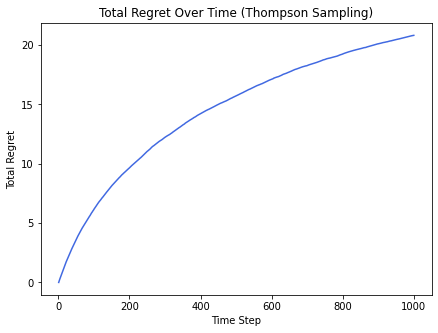

In [ ]:
#bandit must be initialized with zeros
tsBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='zeros');
colours = ["limegreen", "darkgreen", "cyan", "teal", "khaki", "goldenrod", "lightcoral", "maroon", "lightsteelblue", "royalblue"];

plotRewardOverTimeTS(tsBandit, 100, 1000, 22, colours[9], colours[8]);
plotFractionOfRunsTS(tsBandit, 100, 1000, 23, colours[9]);
plotRegretsTS(tsBandit, 100, 1000, 24, colours[9]);



# Analysis


---

Using Thompson Sampling, we observe a convergence towards the true optimal expected action-value (0.5), as well as as logarithmic total loss. This is in-line with our expectations, where the increase in sampling should lower the uncertainty in the priors, leading to the optimal lever being pulled more over time until the prior distribution converges to the true distribution, and the optimal lever is always the one pulled. The algorithm performs well, reaching near-zero regret by the 1000th timestep. 


**Question 8: Best Hyperparameters**

*Best Hyperparameter combination*
1. ϵ-greedy with ϵ = 0.125, alpha = 0 (averaging)
2. UCB with c= 2 and alpha = 0.001
3. Thompson Sampling (no hyperparameters)

The best models were the ones which were found to have the lowest instantaneous and total regret. 


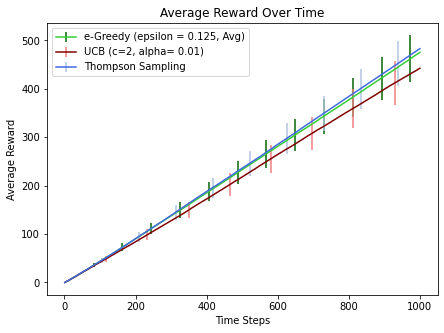

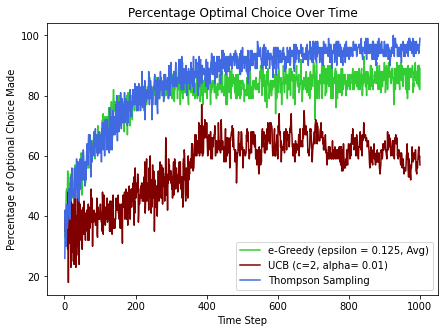

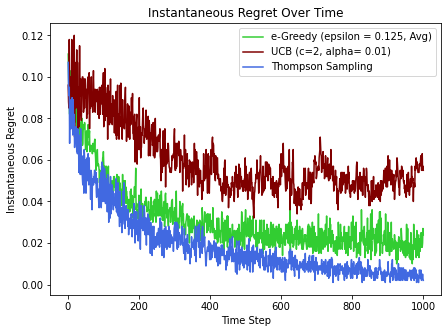

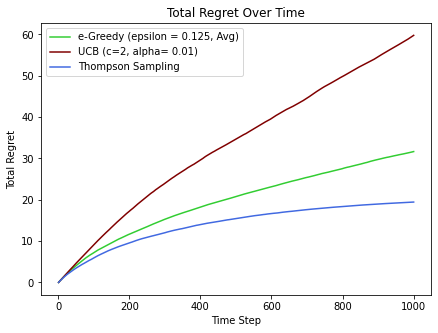

In [ ]:
#bandit must be initialized with zeros
greedyBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='samples');
ucbBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='samples');
tsBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='zeros');
colours = ["limegreen", "darkgreen", "cyan", "teal", "khaki", "goldenrod", "lightcoral", "maroon", "lightsteelblue", "royalblue"];


plotRewardOverTime(greedyBandit, 100, 1000, 0.125, 25,  colours[0], colours[1], alpha=0); #epsilon = 0.125, alpha = 0
plotRewardOverTimeUCB(ucbBandit, 100, 1000, 2,  25, colours[7], colours[6], alpha=0.01) # c= 2, alpha = 0.01
plotRewardOverTimeTS(tsBandit, 100, 1000, 25, colours[9], colours[8]);

greedyBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='samples');
ucbBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='samples');
tsBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='zeros');

plotFractionOfRuns(greedyBandit, 100, 1000, 0.125, 26,  colours[0], alpha=0); #epsilon = 0.125, alpha = 0
plotFractionOfRunsUCB(ucbBandit, 100, 1000, 2,  26, colours[7], alpha=0.01) # c= 2, alpha = 0.01
plotFractionOfRunsTS(tsBandit, 100, 1000, 26, colours[9]);

greedyBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='samples');
ucbBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='samples');
tsBandit = Bandit(3, [0.5,0.5-delta,0.5-2*delta], initialize='zeros');

plotRegrets(greedyBandit, 100, 1000, 0.125, 27,  colours[0], alpha=0); #epsilon = 0.125, alpha = 0
plotRegretsUCB(ucbBandit, 100, 1000, 2,  27, colours[7], alpha=0.01) # c= 2, alpha = 0.01
plotRegretsTS(tsBandit, 100, 1000, 27, colours[9]);

plt.figure(25);
plt.title('Average Reward Over Time');
plt.legend(['e-Greedy (epsilon = 0.125, Avg)', 'UCB (c=2, alpha= 0.01)', 'Thompson Sampling']);

plt.figure(26);
plt.title('Percentage Optimal Choice Over Time');
plt.legend(['e-Greedy (epsilon = 0.125, Avg)', 'UCB (c=2, alpha= 0.01)', 'Thompson Sampling']);

plt.figure(27);
plt.title('Instantaneous Regret Over Time');
plt.legend(['e-Greedy (epsilon = 0.125, Avg)', 'UCB (c=2, alpha= 0.01)', 'Thompson Sampling']);

plt.figure(28);
plt.title('Total Regret Over Time');
plt.legend(['e-Greedy (epsilon = 0.125, Avg)', 'UCB (c=2, alpha= 0.01)', 'Thompson Sampling']);

# Analysis


---

Between the three models, Thompson Sampling appears to perform the best, expressing the lowest logarithmic total regret and converging the fastest towards 100% optimal choice over time. Following this, the ϵ-Greedy algorithm performs similarly well, with the only noticeable difference being slightly higher regret and longer convergence time. UCB performs the worst, with instanteous regret and total regret being the highest across all three algorithms. 

**Question 9: Non-Stationary Problem**

In [ ]:
class NonStationaryBandit:
  def __init__(self,k, probArray, probArray2, switchIndex, initialize='samples'):
    self.k = k;
    self.qTrue = probArray;
    self.OGprobArray = probArray;
    self.OGprobArray2 = probArray2;
    self.qAvgEstimates = np.zeros(k);
    self.qEstimates = np.zeros(k);
    self.numPulls = np.zeros(k);
    self.switchIndex = switchIndex;


    assert k == len(probArray) & k == len(probArray2);

    #Initialize all estimates by sampling levers once
    for armIndex in range(self.k):
      self.qAvgEstimates[armIndex] = self.sample(armIndex);
      self.qEstimates[armIndex] = self.sample(armIndex);
      if(initialize == 'zeros'): #initializes estimates with zeros
        self.qAvgEstimates[armIndex] = 0;
        self.qEstimates[armIndex] = 0;
        self.numPulls[armIndex] = 0;



  
  def sample(self, index):
    if(sum(self.numPulls) == self.switchIndex):
      self.qTrue = self.OGprobArray2; #switch


    self.numPulls[index] +=1;
    return np.random.binomial(n=1, p=self.qTrue[index]);



  def updateAvg(self, armIndex):
    #stores and returns the latest Q estimate of the arm specified by armIndex using the running average method
    reward = self.sample(armIndex);
    self.qAvgEstimates[armIndex] += float(1/self.numPulls[armIndex]) * float((reward - self.qAvgEstimates[armIndex]));

    return [self.qAvgEstimates[armIndex], reward];

  def update(self, armIndex, alpha):
    #stores and returns the latest Q estimate of the arm specified by armIndex using the recency-weighted average method
    reward = self.sample(armIndex);
    self.qEstimates[armIndex] += float(alpha) * float((reward - self.qEstimates[armIndex]));

    return [self.qEstimates[armIndex], reward];

  def reset(self):
    #resets the bandit so it can be used in a new experiment
    for armIndex in range(self.k):
        self.qAvgEstimates[armIndex] = 0;
        self.qEstimates[armIndex] = 0;
        self.numPulls[armIndex] = 0;

    self.qTrue = self.OGprobArray; #switch back


*Introducing non-stationarity by changing true reward probabilities at Timestep = 500*

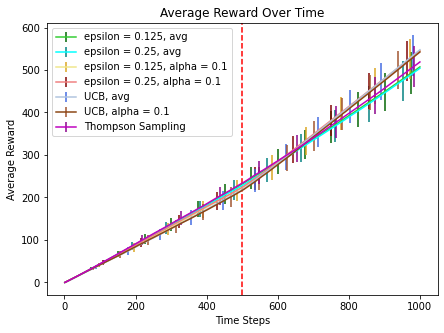

In [ ]:
#bandit must be initialized with zeros
greedyBandit = NonStationaryBandit(3, [0.5,0.5-delta,0.5-2*delta], [0.5, 0.5+delta, 0.5+2*delta], 500, initialize='samples');
ucbBandit = NonStationaryBandit(3, [0.5,0.5-delta,0.5-2*delta], [0.5, 0.5+delta, 0.5+2*delta], 500, initialize='samples');
tsBandit = NonStationaryBandit(3, [0.5,0.5-delta,0.5-2*delta], [0.5, 0.5+delta, 0.5+2*delta], 500, initialize='samples');
colours = ["limegreen", "darkgreen", "cyan", "teal", "khaki", "goldenrod", "lightcoral", "maroon", "lightsteelblue", "royalblue", "saddlebrown", "sienna", "m", "darkmagenta"];


plotRewardOverTime(greedyBandit, 100, 1000, 0.125, 25,  colours[0], colours[1], alpha=0); #epsilon = 0.125, alpha = 0
plotRewardOverTime(greedyBandit, 100, 1000, 0.25, 25,  colours[2], colours[3], alpha=0); #epsilon = 0.25, alpha = 0

plotRewardOverTime(greedyBandit, 100, 1000, 0.125, 25,  colours[4], colours[5], alpha=0.1); #epsilon = 0.125, alpha = 0.1
plotRewardOverTime(greedyBandit, 100, 1000, 0.25, 25,  colours[6], colours[7], alpha=0.1); #epsilon = 0.25, alpha = 0.1

plotRewardOverTimeUCB(ucbBandit, 100, 1000, 2,  25, colours[8], colours[9], alpha=0.01) # c= 2, alpha = 0
plotRewardOverTimeUCB(ucbBandit, 100, 1000, 2,  25, colours[10], colours[11], alpha=0.01) # c= 2, alpha = 0.1


plotRewardOverTimeTS(tsBandit, 100, 1000, 25, colours[12], colours[13]); # thompson sampling

plt.figure(25);
plt.legend(['epsilon = 0.125, avg', 'epsilon = 0.25, avg', 'epsilon = 0.125, alpha = 0.1', 'epsilon = 0.25, alpha = 0.1', 'UCB, avg', 'UCB, alpha = 0.1', 'Thompson Sampling']);
plt.axvline(x=500, color='r', linestyle='dashed');


# Analysis 



---

We first observe that non-UCB algorithms using the averaging method have difficulty adapting to the non-stationary environment after 500 timesteps. Thompson Sampling performs similary, showing a minimal change in reward trajectory after the reward distribution change. Once again, as expected, UCB and recency-weighted algorithms perform relatively better. We observe a changing upwards trajectory in the rewards after 500 timesteps. This suggests that both UCB and recency-weighted algorithms respond well to non-stationary problems. Although the difference between the well-performing algorithms is marginal, we do see the UCB algorithms achieving slightly higher rewards than the ϵ-greedy ones. The UCB algorithm thus seems the best suited to cope with non-stationarity. 